In [1]:
import json
import os
from dataclasses import dataclass
import pandas as pd
from random import sample
import seaborn as sns
import numpy as np

In [2]:
def read_stats(path):
    result = []
    for file in os.listdir(path):
        with open(os.path.join(path, file), "r") as f:
            stats = json.load(f)
        result.extend(stats)
    return result

In [3]:
stats = read_stats("/home/andrew/Documents/study/thesis/thesis-src/experiments/training/V5_3__Test_sm_temprature/stats")

In [9]:
len(stats)

34560

In [4]:
@dataclass
class Record:
    epoch: int
    query_id: int
    neighbour_id: int
    n_idx: int
    similarity: int
    density: int
    softmax: int
    
def process_stats(stats):
    result = []
    for record in stats:
        epoch = record["epoch"]
        query_id = record["query_id"]
        
        for i, n_id in enumerate(record["neighbours_id"]):
            similarity = record["weights"][i]
            density = record["density"][i]
            softmax = np.exp(record["softmax"][i])
            result.append(Record(epoch, query_id, n_id, i, similarity, density, softmax))
    return result



In [5]:
new_stats = process_stats(stats)

In [7]:
df = pd.DataFrame(new_stats)

In [13]:
query_id_sample = sample(df.query_id.unique().tolist(),10)

In [14]:
subset=df.loc[df.query_id.isin(query_id_sample)]

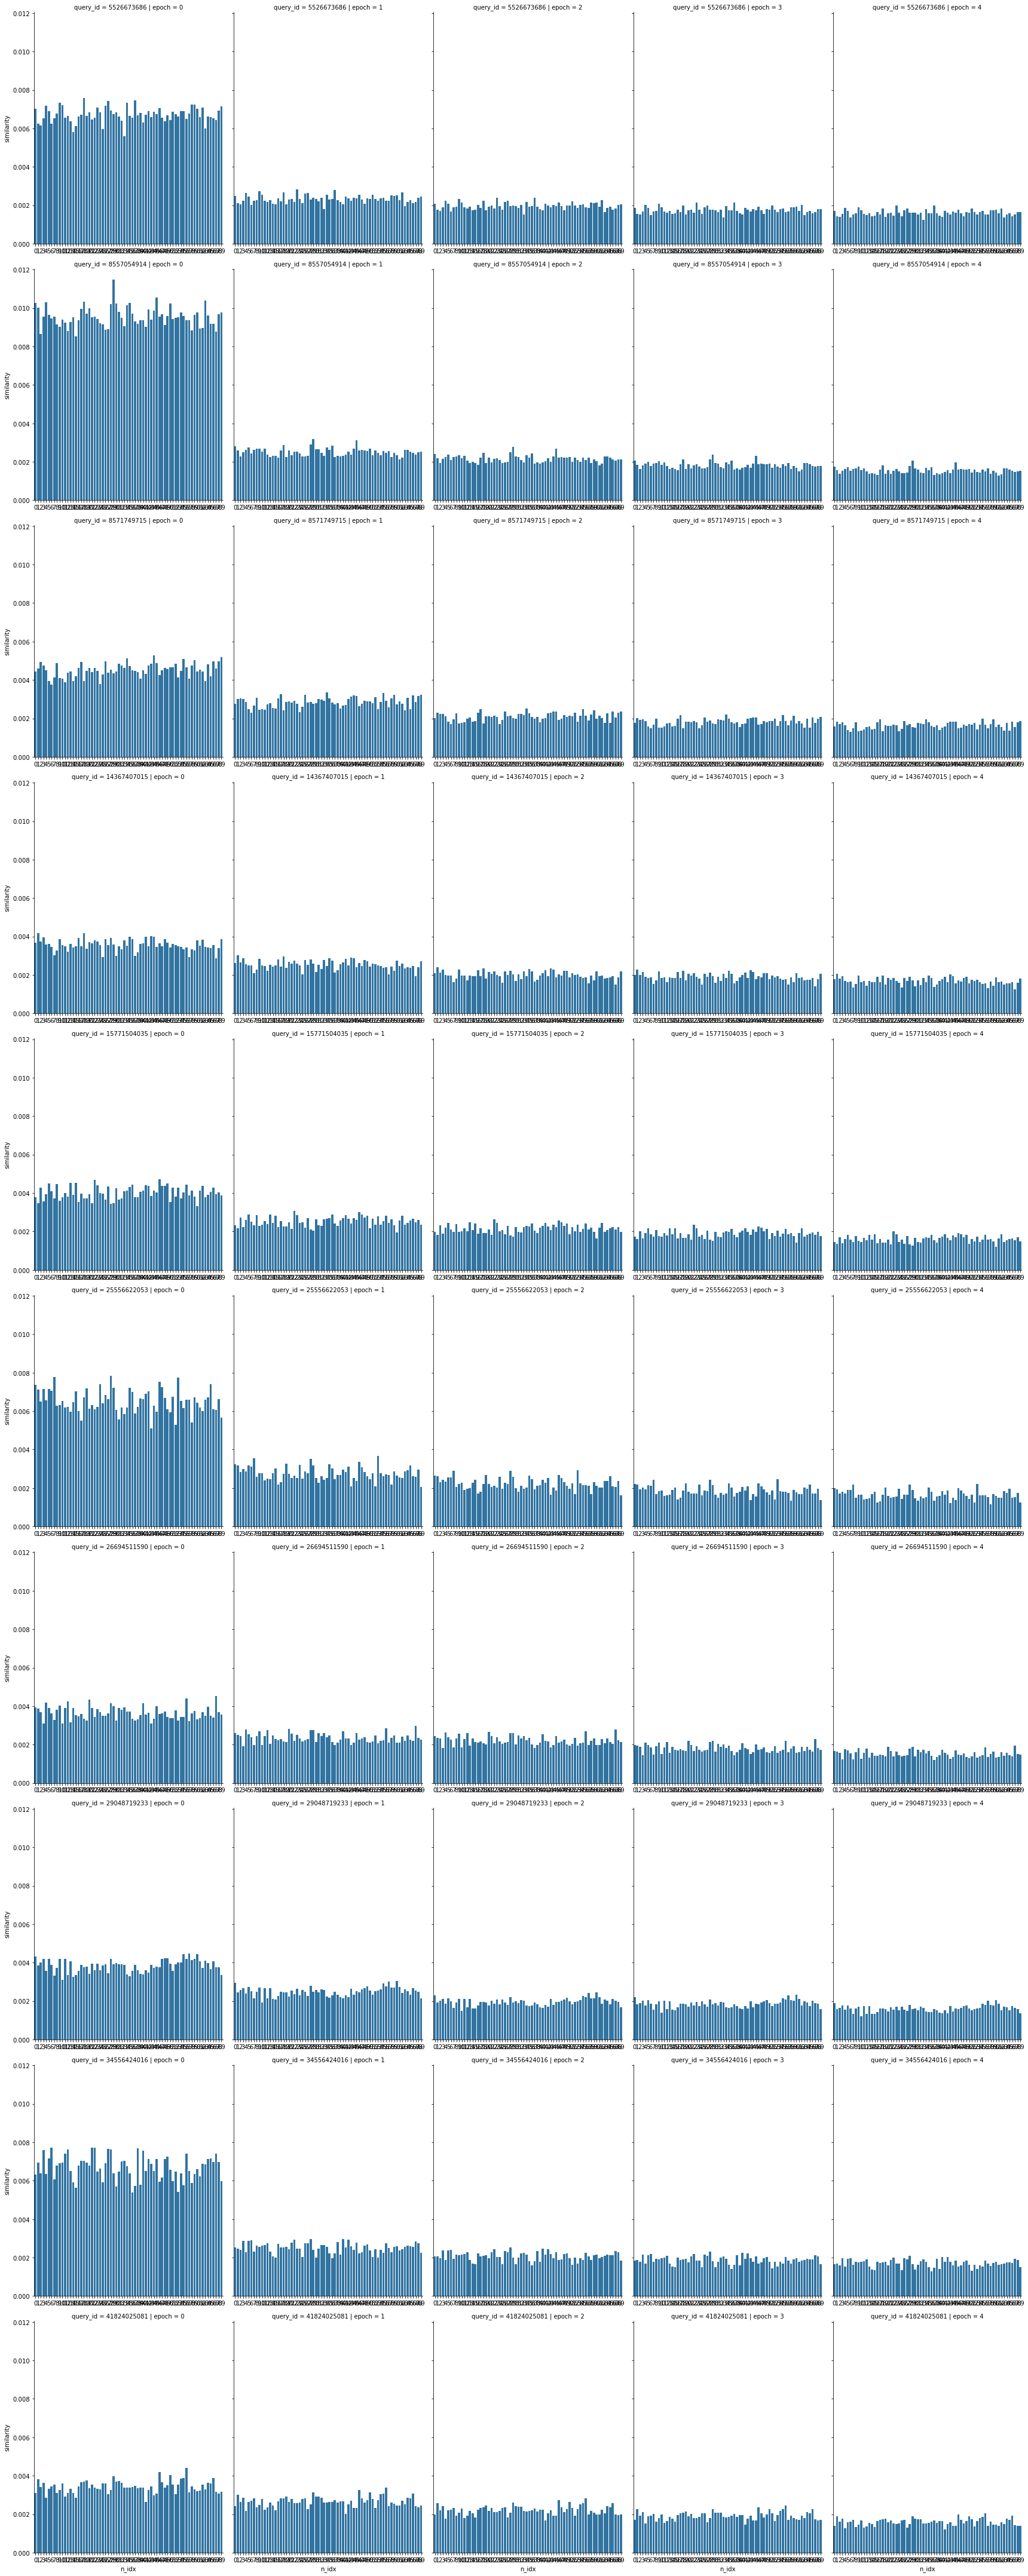

In [15]:
g=sns.FacetGrid(data=subset, row="query_id", col="epoch", sharex=False, sharey=True, height=6, aspect=0.8)
g.map_dataframe(sns.barplot, x="n_idx", y="similarity")

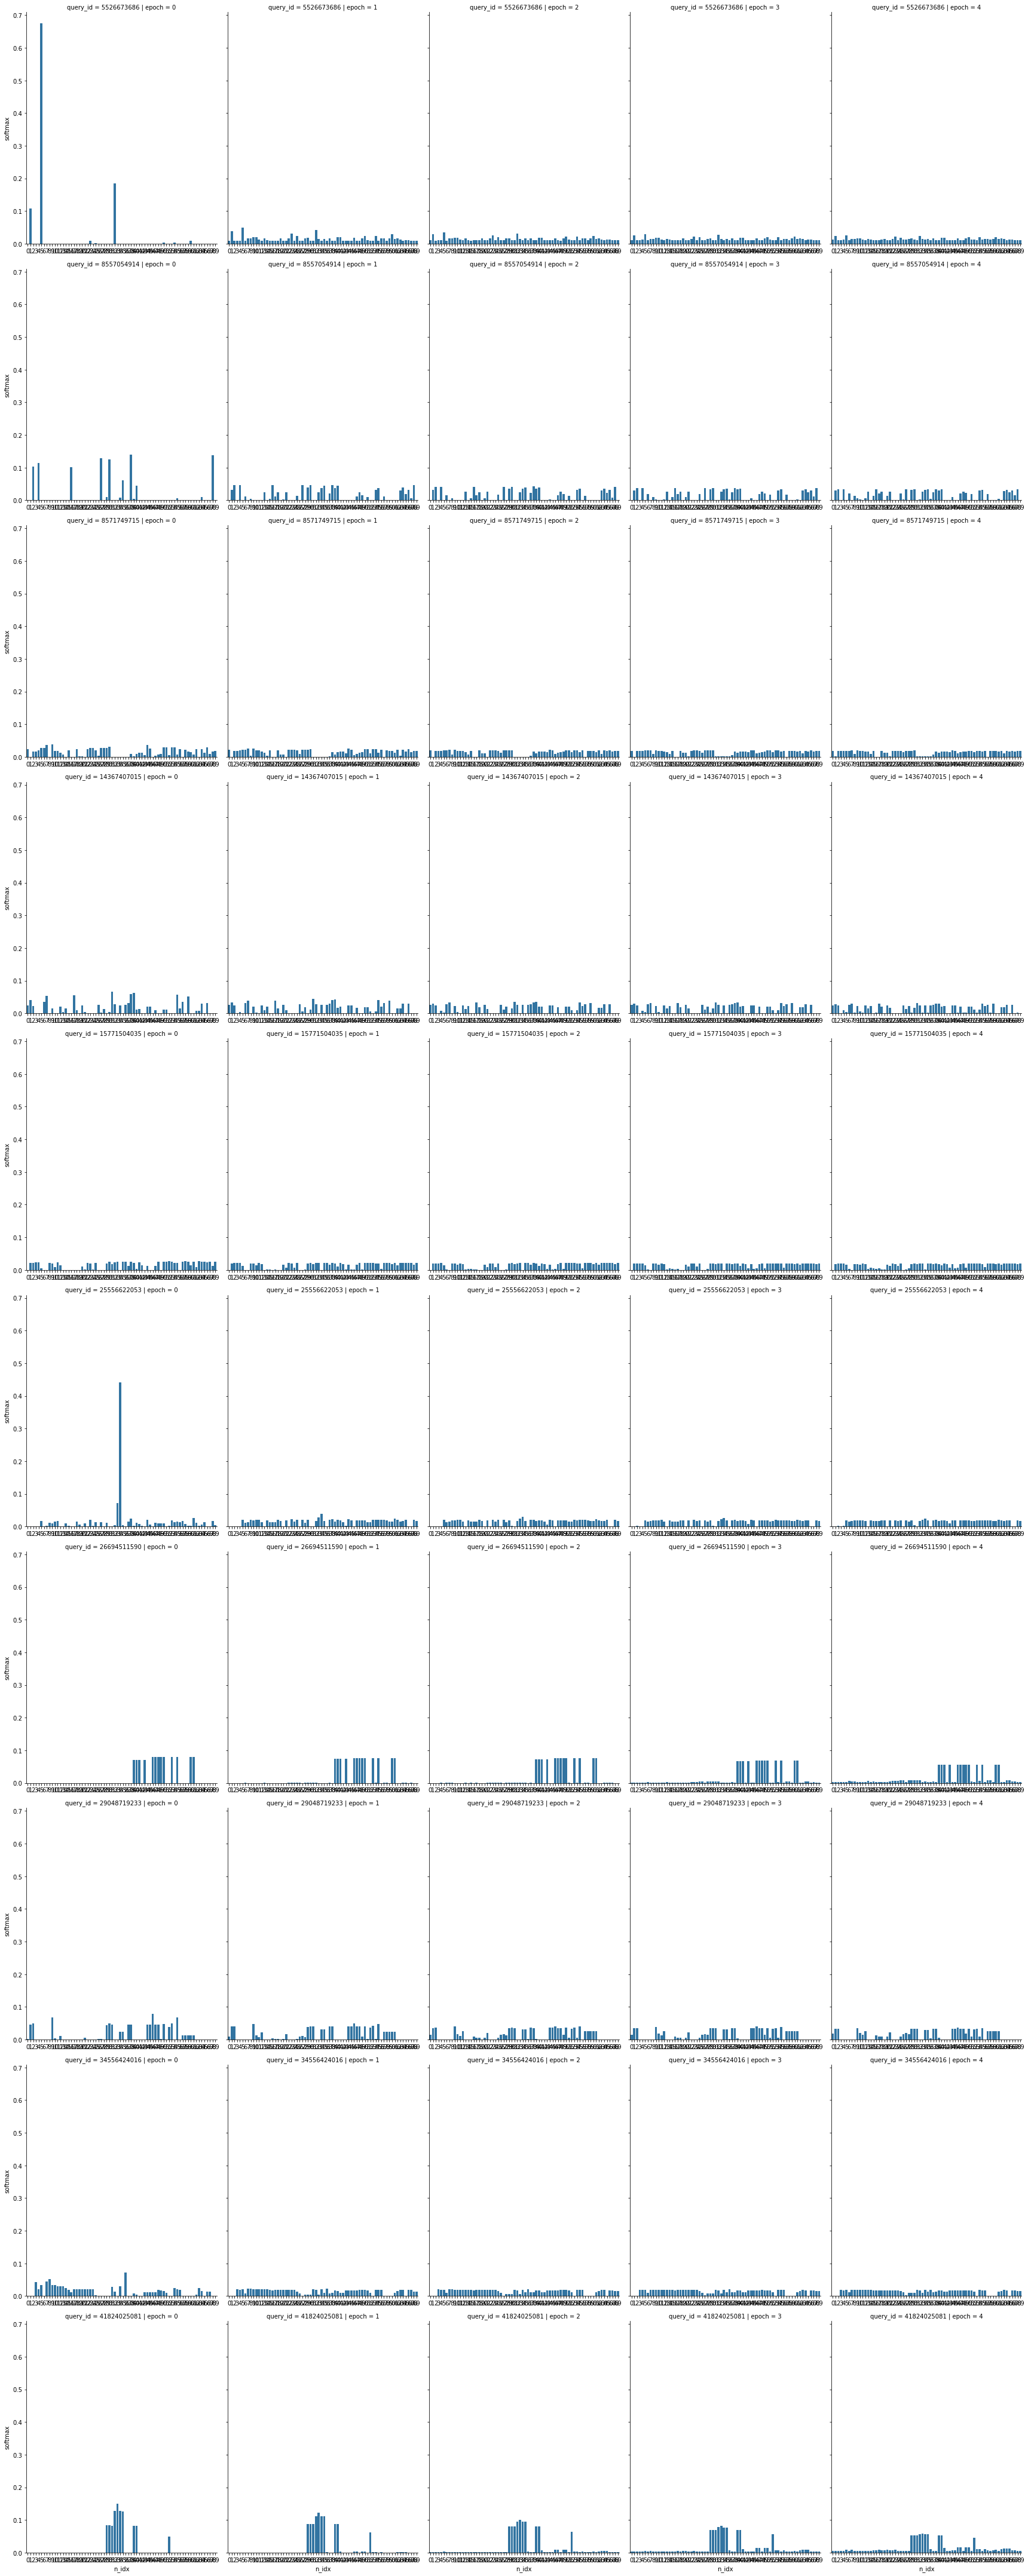

In [17]:
g=sns.FacetGrid(data=subset, row="query_id", col="epoch", sharex=False, sharey=True, height=6, aspect=0.8)
g.map_dataframe(sns.barplot, x="n_idx", y="softmax")

In [11]:
subset.describe()

,epoch,query_id,neighbour_id,n_idx,similarity,density,softmax
count,3500.000000,3.500000e+03,3.500000e+03,3500.000000,3500.000000,3500.000000,3.500000e+03
mean,2.000000,1.789600e+10,1.547243e+10,34.500000,0.001041,0.001468,1.428571e-02
std,1.414416,1.549926e+10,1.512734e+10,20.208084,0.001240,0.007652,7.642320e-03
min,0.000000,2.386832e+09,5.136824e+06,0.000000,0.000373,0.000002,2.550508e-244
25%,1.000000,5.486435e+09,3.763292e+09,17.000000,0.000607,0.000025,1.096466e-02
50%,2.000000,1.182853e+10,8.321981e+09,34.500000,0.000700,0.000245,1.530885e-02
75%,3.000000,3.076586e+10,2.667182e+10,52.000000,0.000846,0.000346,1.748636e-02
max,4.000000,5.029367e+10,5.048936e+10,69.000000,0.010528,0.056540,7.804487e-02


In [34]:
subset.density


270760     4.025004e-09
270761     3.525880e-09
270762     4.015408e-09
270763     3.717383e-09
270764     3.968566e-09
               ...     
2249025    2.573477e-10
2249026    3.883845e-09
2249027    3.897420e-09
2249028    3.897420e-09
2249029    3.846228e-09
Name: density, Length: 350, dtype: float64

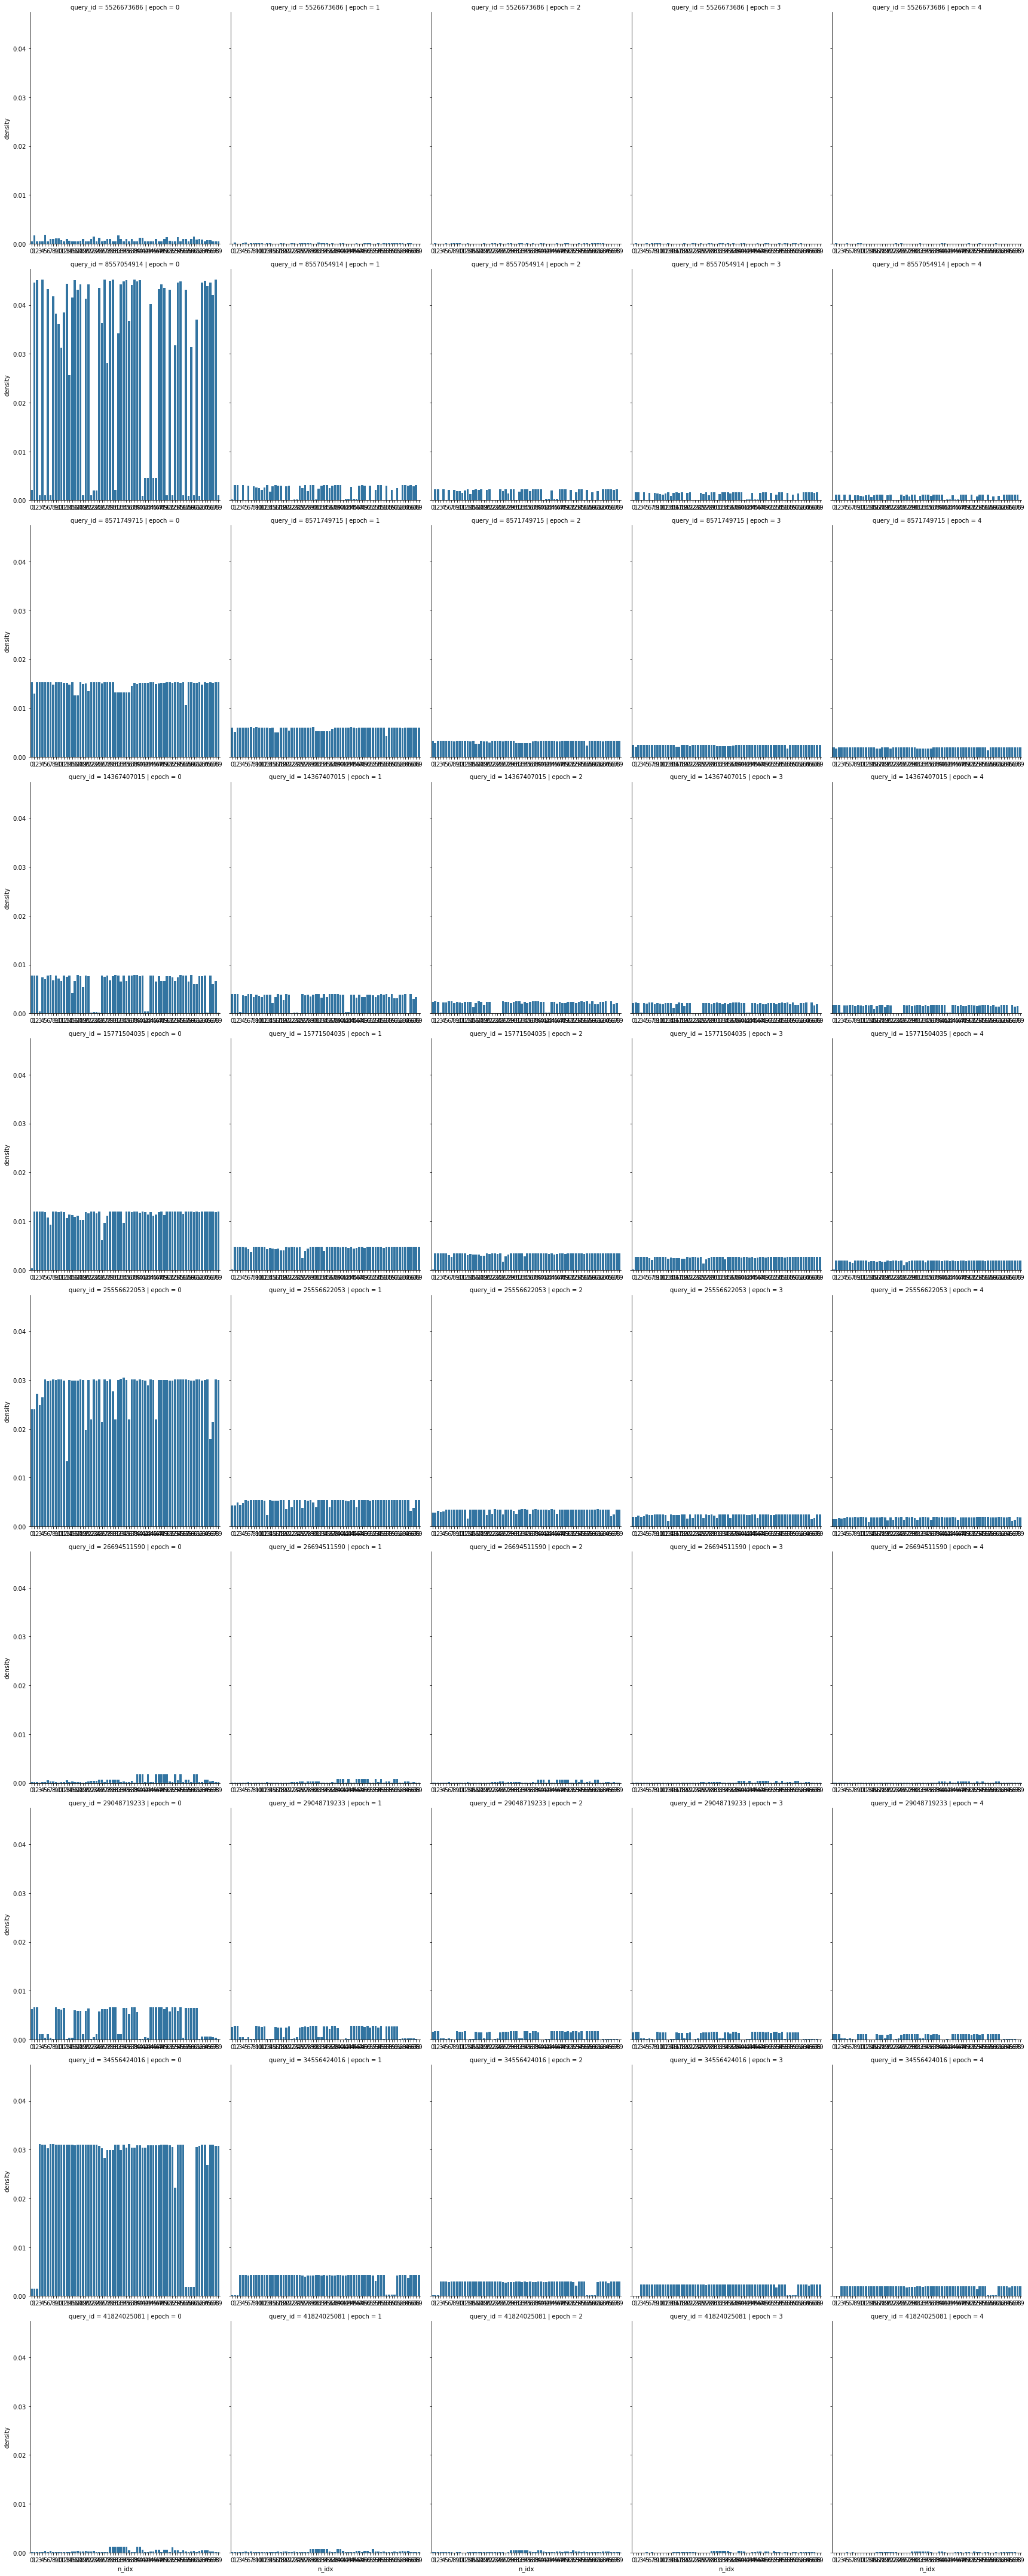

In [16]:
g=sns.FacetGrid(data=subset, row="query_id", col="epoch", sharex=False, sharey=True, height=6, aspect=0.8)
g.map_dataframe(sns.barplot, x="n_idx", y="density")